<a href="https://colab.research.google.com/github/LucianaPeroni/Data-Twitter-Eleicoes-2022/blob/main/DTE_analise_de_sentimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##Etapa 4 - Análise de Sentimentos

In [260]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [261]:
pip install --upgrade vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Bibliotecas

In [262]:
import pandas as pd

In [263]:
import re

In [264]:
import matplotlib.pyplot as plt

In [265]:
import seaborn as sns

In [266]:
import nltk # processamento de linguagem natural

In [267]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

Dataframe

In [268]:
dataframe_sentimento=pd.read_csv('dataframe_unico_candidatos_ok.csv')

In [269]:
dataframe_sentimento.head()

,Data_hora,idTweet,Tweet,Candidato,Tweet_limpo
0,2022-07-31 08:41:01+00:00,1553662000097644546,@brasildefato LULA COMPRADO ALCKEMIN https://t...,Lula,@brasildefato lula comprado alckemin https://t...
1,2022-07-31 08:40:56+00:00,1553661978626899968,@senadorhumberto @CamiloSantanaCE @elmanofreit...,Lula,@senadorhumberto @camilosantanace @elmanofreit...
2,2022-07-31 08:40:49+00:00,1553661949694590977,@LulaOficial PQP o cara tem q ser muito idiota...,Lula,@lulaoficial pqp o cara tem q ser muito idiota...
3,2022-07-31 08:40:44+00:00,1553661931575054336,@kazuhaC1G1P1 HY LULAAA. Kalo gua sukanya film...,Lula,@kazuhac1g1p1 hy lulaaa. kalo gua sukanya film...
4,2022-07-31 08:40:32+00:00,1553661881889464320,"@Rocha7591 E a do Lula não põe ?? 73.000,00 po...",Lula,"@rocha7591 e a do lula não põe ?? 73.000,00 po..."


Análise

In [270]:
analise_texto= SentimentIntensityAnalyzer()

In [271]:
dataframe_sentimento['Sentimento']= dataframe_sentimento['Tweet_limpo'].apply(lambda i:analise_texto.polarity_scores(' '.join(re.findall(r'\w+', i.lower()))))

In [272]:
dataframe_sentimento.head()

,Data_hora,idTweet,Tweet,Candidato,Tweet_limpo,Sentimento
0,2022-07-31 08:41:01+00:00,1553662000097644546,@brasildefato LULA COMPRADO ALCKEMIN https://t...,Lula,@brasildefato lula comprado alckemin https://t...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,2022-07-31 08:40:56+00:00,1553661978626899968,@senadorhumberto @CamiloSantanaCE @elmanofreit...,Lula,@senadorhumberto @camilosantanace @elmanofreit...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,2022-07-31 08:40:49+00:00,1553661949694590977,@LulaOficial PQP o cara tem q ser muito idiota...,Lula,@lulaoficial pqp o cara tem q ser muito idiota...,"{'neg': 0.042, 'neu': 0.958, 'pos': 0.0, 'comp..."
3,2022-07-31 08:40:44+00:00,1553661931575054336,@kazuhaC1G1P1 HY LULAAA. Kalo gua sukanya film...,Lula,@kazuhac1g1p1 hy lulaaa. kalo gua sukanya film...,"{'neg': 0.145, 'neu': 0.855, 'pos': 0.0, 'comp..."
4,2022-07-31 08:40:32+00:00,1553661881889464320,"@Rocha7591 E a do Lula não põe ?? 73.000,00 po...",Lula,"@rocha7591 e a do lula não põe ?? 73.000,00 po...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [273]:
dataframe_sentimento['Sentimento']

0      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2      {'neg': 0.042, 'neu': 0.958, 'pos': 0.0, 'comp...
3      {'neg': 0.145, 'neu': 0.855, 'pos': 0.0, 'comp...
4      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
                             ...                        
448    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
449    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
450    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
451    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
452    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: Sentimento, Length: 453, dtype: object

In [274]:
dataframe_sentimento['Positivo']= dataframe_sentimento['Sentimento'].apply(lambda i:i['pos'])
dataframe_sentimento['Neutro']= dataframe_sentimento['Sentimento'].apply(lambda i:i['neu'])
dataframe_sentimento['Negativo']= dataframe_sentimento['Sentimento'].apply(lambda i:i['neg'])
dataframe_sentimento['Composicao']= dataframe_sentimento['Sentimento'].apply(lambda i:i['compound'])

In [275]:
dataframe_sentimento.head()

,Data_hora,idTweet,Tweet,Candidato,Tweet_limpo,Sentimento,Positivo,Neutro,Negativo,Composicao
0,2022-07-31 08:41:01+00:00,1553662000097644546,@brasildefato LULA COMPRADO ALCKEMIN https://t...,Lula,@brasildefato lula comprado alckemin https://t...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0.0000
1,2022-07-31 08:40:56+00:00,1553661978626899968,@senadorhumberto @CamiloSantanaCE @elmanofreit...,Lula,@senadorhumberto @camilosantanace @elmanofreit...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0.0000
2,2022-07-31 08:40:49+00:00,1553661949694590977,@LulaOficial PQP o cara tem q ser muito idiota...,Lula,@lulaoficial pqp o cara tem q ser muito idiota...,"{'neg': 0.042, 'neu': 0.958, 'pos': 0.0, 'comp...",0.0,0.958,0.042,-0.2960
3,2022-07-31 08:40:44+00:00,1553661931575054336,@kazuhaC1G1P1 HY LULAAA. Kalo gua sukanya film...,Lula,@kazuhac1g1p1 hy lulaaa. kalo gua sukanya film...,"{'neg': 0.145, 'neu': 0.855, 'pos': 0.0, 'comp...",0.0,0.855,0.145,-0.5994
4,2022-07-31 08:40:32+00:00,1553661881889464320,"@Rocha7591 E a do Lula não põe ?? 73.000,00 po...",Lula,"@rocha7591 e a do lula não põe ?? 73.000,00 po...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0.0000


In [276]:
sentimento=[]

In [277]:
for i in dataframe_sentimento['Composicao']:
  if i>= 0.05:
    sentimento.append('Positivo')
  elif i<=(-0.05):
    sentimento.append('Negativo')
  else:
    sentimento.append('Neutro')

In [278]:
sentimento

['Neutro',
 'Neutro',
 'Negativo',
 'Negativo',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Negativo',
 'Negativo',
 'Neutro',
 'Neutro',
 'Positivo',
 'Positivo',
 'Neutro',
 'Neutro',
 'Negativo',
 'Positivo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Negativo',
 'Negativo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Negativo',
 'Neutro',
 'Positivo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro

In [279]:
dataframe_sentimento['Sentimento_Final']=sentimento

In [280]:
dataframe_sentimento.tail()

,Data_hora,idTweet,Tweet,Candidato,Tweet_limpo,Sentimento,Positivo,Neutro,Negativo,Composicao,Sentimento_Final
448,2022-07-31 07:07:47+00:00,1553638537618137088,@fedeonofri @Fen_church Se va bene una pizzeri...,Ciro,@fedeonofri @fen_church se va bene una pizzeri...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0,Neutro
449,2022-07-31 07:07:00+00:00,1553638341328965632,@cirogomes Ciro fazendo ciranda..logo vai cira...,Ciro,@cirogomes ciro fazendo ciranda..logo vai cira...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0,Neutro
450,2022-07-31 07:06:45+00:00,1553638276849885184,@Rosimeire7235 @ciro_nogueira @LuGamoradecor V...,Ciro,@rosimeire7235 @ciro_nogueira @lugamoradecor v...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0,Neutro
451,2022-07-31 07:06:43+00:00,1553638268801290240,@beutik_company Pemain inti yg ga maen kemaren...,Ciro,@beutik_company pemain inti yg ga maen kemaren...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0,Neutro
452,2022-07-31 07:04:17+00:00,1553637659867840512,@garcia_ciro ratio,Ciro,@garcia_ciro ratio,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0,Neutro


In [281]:
dataframe_sentimento['Sentimento_Final'].value_counts()

Neutro      345
Negativo     82
Positivo     26
Name: Sentimento_Final, dtype: int64

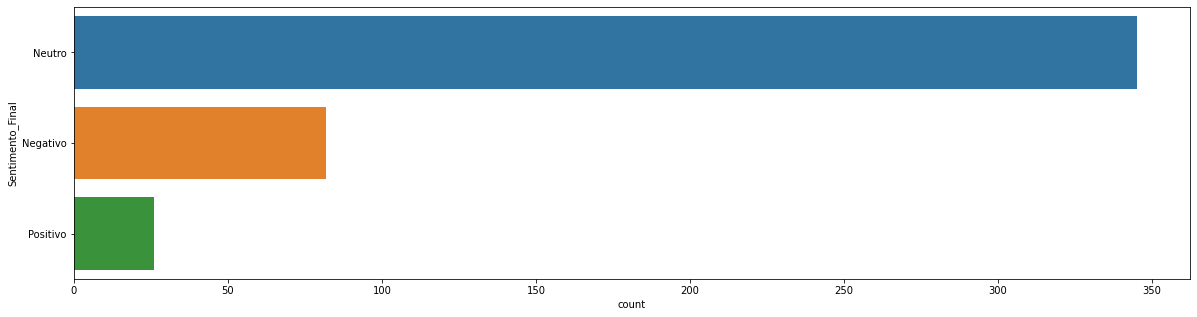

In [282]:
plt.figure(figsize=(20,5))
sns.countplot(y='Sentimento_Final',data=dataframe_sentimento)

###Lula

In [283]:
resultado_filtro_lula = dataframe_sentimento[dataframe_sentimento['Candidato']=='Lula']

In [284]:
resultado_filtro_lula['Candidato'].unique()


array(['Lula'], dtype=object)

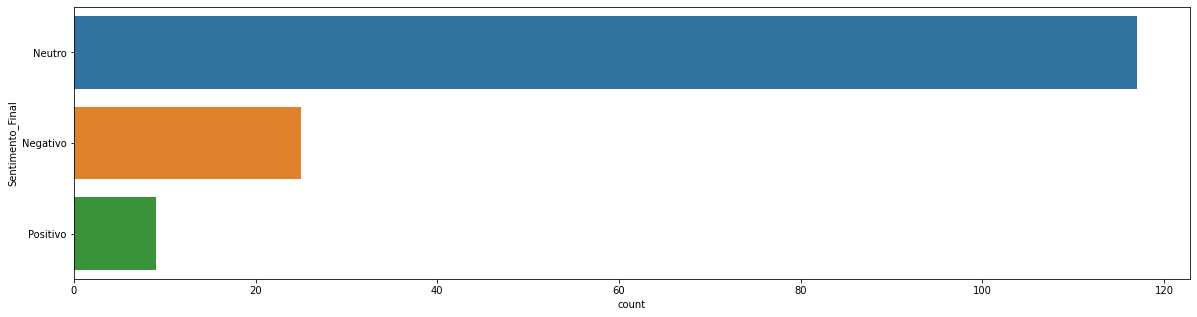

In [285]:
plt.figure(figsize=(20,5))
sns.countplot(y='Sentimento_Final',data=resultado_filtro_lula)

###Bolsonaro

In [286]:
resultado_filtro_bolsonaro = dataframe_sentimento[dataframe_sentimento['Candidato']=='Bolsonaro']

In [287]:
resultado_filtro_bolsonaro['Candidato'].unique()

array(['Bolsonaro'], dtype=object)

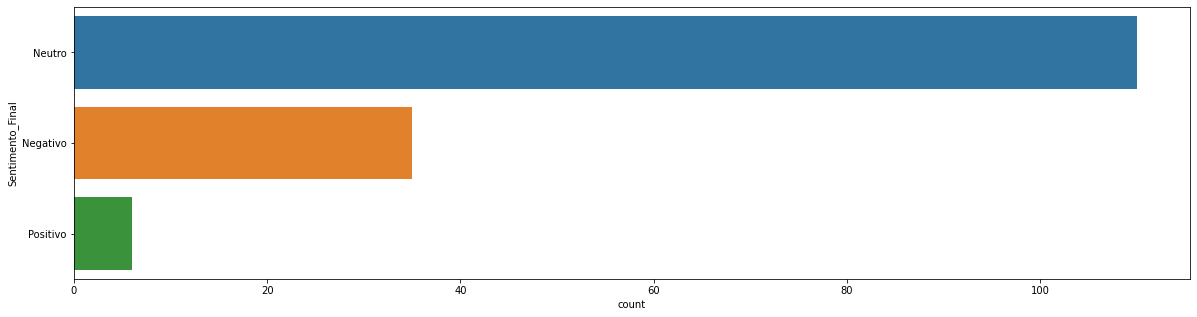

In [288]:
plt.figure(figsize=(20,5))
sns.countplot(y='Sentimento_Final',data=resultado_filtro_bolsonaro)

###Ciro

In [289]:
resultado_filtro_ciro = dataframe_sentimento[dataframe_sentimento['Candidato']=='Ciro']

In [290]:
resultado_filtro_ciro['Candidato'].unique()

array(['Ciro'], dtype=object)

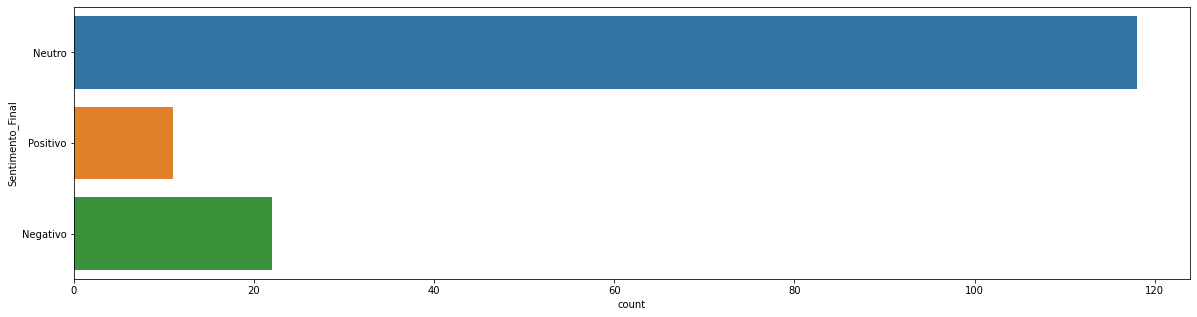

In [291]:
plt.figure(figsize=(20,5))
sns.countplot(y='Sentimento_Final',data=resultado_filtro_ciro)

In [292]:
dataframe_final =dataframe_sentimento[['Data_hora','idTweet','Tweet','Candidato','Tweet_limpo','Sentimento_Final']]

In [293]:
dataframe_final.head()

,Data_hora,idTweet,Tweet,Candidato,Tweet_limpo,Sentimento_Final
0,2022-07-31 08:41:01+00:00,1553662000097644546,@brasildefato LULA COMPRADO ALCKEMIN https://t...,Lula,@brasildefato lula comprado alckemin https://t...,Neutro
1,2022-07-31 08:40:56+00:00,1553661978626899968,@senadorhumberto @CamiloSantanaCE @elmanofreit...,Lula,@senadorhumberto @camilosantanace @elmanofreit...,Neutro
2,2022-07-31 08:40:49+00:00,1553661949694590977,@LulaOficial PQP o cara tem q ser muito idiota...,Lula,@lulaoficial pqp o cara tem q ser muito idiota...,Negativo
3,2022-07-31 08:40:44+00:00,1553661931575054336,@kazuhaC1G1P1 HY LULAAA. Kalo gua sukanya film...,Lula,@kazuhac1g1p1 hy lulaaa. kalo gua sukanya film...,Negativo
4,2022-07-31 08:40:32+00:00,1553661881889464320,"@Rocha7591 E a do Lula não põe ?? 73.000,00 po...",Lula,"@rocha7591 e a do lula não põe ?? 73.000,00 po...",Neutro


In [294]:
dataframe_final.to_csv('dataframe_final.csv',sep=',', index=False)